## Installs and imports

In [1]:
import torch

In [2]:
!pip install networkx==3.1

In [3]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu


In [4]:
!pip install scikit-learn

In [5]:
# !nohup jupyter lab --ip=0.0.0.0 --port=8888 --no-browser &

In [6]:
# !disown %1

In [7]:
%%capture

# the environment we will be working with and its dependencies
!pip install gymnasium
!pip install nrel-pysam
!pip install simplejson
# TODO: update to install stable version from PyPi
!pip install CityLearn

# to generate static figures
!pip install matplotlib
!pip install seaborn

# provide standard RL algorithms
!pip install --no-deps stable-baselines3

# results submission
!pip install requests
!pip install beautifulsoup4

# progress bar
!pip install tqdm

In [8]:
%pip install jupyter notebook

Note: you may need to restart the kernel to use updated packages.


In [9]:
# system operations
import inspect
import os
import uuid
import warnings
from typing import List, Tuple

# date and time
import datetime

# type hinting
from typing import Any

# User interaction
from ipywidgets import Button, HTML
from ipywidgets import Text, HBox, VBox

# data visualization
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from tqdm import tqdm

# data manipulation
from bs4 import BeautifulSoup
import math
import numpy as np
import pandas as pd
import random
import re
import requests
import simplejson as json

# cityLearn
from citylearn.agents.base import (
    BaselineAgent,
)
from citylearn.agents.q_learning import TabularQLearning
from citylearn.citylearn import CityLearnEnv
from citylearn.data import DataSet
from citylearn.reward_function import RewardFunction
from citylearn.wrappers import (
    NormalizedObservationWrapper,
    StableBaselines3Wrapper,
)

# RL algorithms
from stable_baselines3 import SAC

In [10]:
# set all plotted figures without margins
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
%matplotlib inline



## Setup environment 

In [11]:
selected_building = ["Building_1"]


In [12]:
DATASET_NAME = 'citylearn_challenge_2023_phase_1'
schema = DataSet.get_schema(DATASET_NAME)
root_directory = schema['root_directory']
schema

{'random_seed': 2023,
 'root_directory': '/home/wepea2/.local/lib/python3.8/site-packages/citylearn/data/datasets/citylearn_challenge_2023_phase_1',
 'central_agent': True,
 'simulation_start_time_step': 0,
 'simulation_end_time_step': 719,
 'episode_time_steps': None,
 'rolling_episode_split': False,
 'random_episode_split': False,
 'seconds_per_time_step': 3600.0,
 'observations': {'month': {'active': False, 'shared_in_central_agent': True},
  'day_type': {'active': True, 'shared_in_central_agent': True},
  'hour': {'active': True, 'shared_in_central_agent': True},
  'daylight_savings_status': {'active': False,
   'shared_in_central_agent': True},
  'outdoor_dry_bulb_temperature': {'active': True,
   'shared_in_central_agent': True},
  'outdoor_dry_bulb_temperature_predicted_6h': {'active': True,
   'shared_in_central_agent': True},
  'outdoor_dry_bulb_temperature_predicted_12h': {'active': True,
   'shared_in_central_agent': True},
  'outdoor_dry_bulb_temperature_predicted_24h': {'a

In [13]:
'''View PRICING data'''
# change the suffix number in the next code line to a
# number between 1 and 17 to preview other buildings
selected_building = "Building_1"
filename = schema['buildings'][selected_building]['pricing']
filepath = os.path.join(root_directory, filename)
building_data = pd.read_csv(filepath)
display(building_data.head(25))

,electricity_pricing,electricity_pricing_predicted_6h,electricity_pricing_predicted_12h,electricity_pricing_predicted_24h
0,0.02893,0.02893,0.02915,0.02893
1,0.02893,0.02915,0.02915,0.02893
2,0.02893,0.02915,0.02915,0.02893
3,0.02893,0.02915,0.05867,0.02893
4,0.02893,0.02915,0.05867,0.02893
5,0.02893,0.02915,0.05867,0.02893
6,0.02893,0.02915,0.02915,0.02893
7,0.02915,0.02915,0.02915,0.02893
8,0.02915,0.02915,0.02915,0.02893
9,0.02915,0.05867,0.02915,0.02893


Bring over other weather file

In [14]:
# DATASET_NAME = 'citylearn_challenge_2023_phase_2_online_evaluation_1'
# schemao = DataSet.get_schema(DATASET_NAME)
# root_directory = schemao['root_directory']
# schemao

In [15]:
'''View weather data'''
filename = schema['buildings'][selected_building]['weather']
filepath = os.path.join(root_directory, filename)
weather_data = pd.read_csv(filepath)
# building_data.info()

for index, value in weather_data["outdoor_dry_bulb_temperature"] .items():
    weather_data.at[index, 'outdoor_dry_bulb_temperature'] = round(random.uniform(24, 30), 2)
display(weather_data.head(10))




,outdoor_dry_bulb_temperature,outdoor_relative_humidity,diffuse_solar_irradiance,direct_solar_irradiance,outdoor_dry_bulb_temperature_predicted_6h,outdoor_dry_bulb_temperature_predicted_12h,outdoor_dry_bulb_temperature_predicted_24h,outdoor_relative_humidity_predicted_6h,outdoor_relative_humidity_predicted_12h,outdoor_relative_humidity_predicted_24h,diffuse_solar_irradiance_predicted_6h,diffuse_solar_irradiance_predicted_12h,diffuse_solar_irradiance_predicted_24h,direct_solar_irradiance_predicted_6h,direct_solar_irradiance_predicted_12h,direct_solar_irradiance_predicted_24h
0,26.90,77.56,0.00,0.00,24.910638,38.415958,27.611464,72.980273,41.822361,83.230997,54.625927,116.842886,0.000000,143.324335,1020.756093,0.000000
1,29.18,85.12,0.00,0.00,27.076564,38.319349,23.515498,87.317655,37.910023,95.353948,78.375479,89.220504,0.000000,300.361061,825.097292,0.000000
2,26.02,89.62,0.00,0.00,29.351833,39.150482,23.659443,60.341453,30.190199,66.266409,259.822134,82.855932,0.000000,196.691127,987.909330,0.000000
3,28.84,91.88,0.00,0.00,31.032975,40.934789,26.686004,50.063925,31.519739,94.456370,248.631525,105.130119,0.000000,465.483196,854.331825,0.000000
4,28.19,93.06,0.00,0.00,33.814467,39.717841,24.467758,40.942579,33.119543,100.000000,272.825159,75.627986,0.000000,569.203332,941.243325,0.000000
5,24.34,93.25,0.00,0.00,36.442673,38.721996,25.222326,44.298462,31.612091,100.000000,132.196509,65.864163,0.000000,911.750136,468.383483,0.000000
6,26.71,86.19,56.19,140.63,36.919558,34.716494,24.522086,39.487851,30.496082,73.839506,133.818782,41.657165,63.052147,703.676473,234.781365,185.178344
7,26.01,74.56,90.91,268.13,38.978542,33.505668,27.364583,28.588518,56.134218,63.504539,96.567311,0.000000,189.493796,916.126750,0.000000,401.817615
8,24.11,62.75,218.81,197.38,39.550983,29.976658,30.812953,23.190601,36.918401,65.210759,122.018210,0.000000,147.057274,998.786086,0.000000,624.643111
9,25.34,52.56,278.20,405.23,39.498924,28.918430,33.260220,27.604938,67.003027,29.821942,128.235725,0.000000,148.782851,834.032966,0.000000,844.468067


#### Save weather data

In [16]:
# filename = schema['buildings'][selected_building]['weather']
# filepath = os.path.join(root_directory, filename)
# weather_data.to_csv(filepath, index=False)

In [17]:
outdoor_temp = weather_data["outdoor_dry_bulb_temperature"].describe()
outdoor_temp

count    720.000000
mean      27.003792
std        1.721352
min       24.000000
25%       25.505000
50%       27.040000
75%       28.440000
max       29.990000
Name: outdoor_dry_bulb_temperature, dtype: float64

In [18]:
'''View energy simulation data'''
import random

filename = schema['buildings'][selected_building]['energy_simulation']
filepath = os.path.join(root_directory, filename)
building_data = pd.read_csv(filepath)
# display(building_data.head(10))

# #Modify data to be more relevant
# building_data.loc[:, 'indoor_dry_bulb_temperature_set_point'] = 25
# building_data.loc[:, 'hvac_mode'] = 3
# building_data.loc[:, 'average_unmet_cooling_setpoint_difference'] = 0

# # building_data.loc[:, 'cooling_demand'] = 0
# building_data.loc[:, 'heating_demand'] = 0






for index, value in building_data["indoor_dry_bulb_temperature"] .items():
    building_data.at[index, 'indoor_dry_bulb_temperature'] = random.uniform(24, 30)




display(building_data.head(10))

building_data.info()

,month,hour,day_type,daylight_savings_status,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,dhw_demand,cooling_demand,heating_demand,solar_generation,occupant_count,indoor_dry_bulb_temperature_set_point,hvac_mode
0,6,1,5,0,29.842138,0.0,61.086185,0.356839,0.055682,1.119216,0.0,0.000000,3.0,25.0,3
1,6,2,5,0,26.434350,0.0,64.361380,0.345078,0.159338,1.469638,0.0,0.000000,3.0,25.0,3
2,6,3,5,0,29.841538,0.0,64.493416,0.338769,0.057004,1.458372,0.0,0.000000,3.0,25.0,3
3,6,4,5,0,28.267078,0.0,64.769700,0.334856,0.000000,0.000000,0.0,0.000000,3.0,25.0,3
4,6,5,5,0,27.596177,0.0,65.152120,0.348607,0.000000,1.163453,0.0,0.000000,3.0,25.0,3
5,6,6,5,0,27.891646,0.0,65.871284,0.346894,0.334834,1.335715,0.0,0.000000,3.0,25.0,3
6,6,7,5,0,25.878820,0.0,66.065575,0.408589,0.905819,0.000000,0.0,25.331348,2.0,25.0,3
7,6,8,5,0,24.402428,0.0,65.945410,0.402513,0.000000,0.000000,0.0,91.302536,2.0,25.0,3
8,6,9,5,0,24.124957,0.0,64.098340,0.452810,3.315016,4.025016,0.0,221.975020,2.0,25.0,3
9,6,10,5,0,27.923545,0.0,62.219505,0.400676,0.215396,2.458844,0.0,401.644070,1.0,25.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   month                                      720 non-null    int64  
 1   hour                                       720 non-null    int64  
 2   day_type                                   720 non-null    int64  
 3   daylight_savings_status                    720 non-null    int64  
 4   indoor_dry_bulb_temperature                720 non-null    float64
 5   average_unmet_cooling_setpoint_difference  720 non-null    float64
 6   indoor_relative_humidity                   720 non-null    float64
 7   non_shiftable_load                         720 non-null    float64
 8   dhw_demand                                 720 non-null    float64
 9   cooling_demand                             720 non-null    float64
 10  heating_demand            

In [19]:
indoor_temp = building_data["indoor_dry_bulb_temperature"].describe()
indoor_temp


count    720.000000
mean      27.013617
std        1.732535
min       24.012231
25%       25.505311
50%       26.984998
75%       28.485789
max       29.999135
Name: indoor_dry_bulb_temperature, dtype: float64

In [20]:
demand_comp = building_data[building_data["heating_demand"] > building_data["cooling_demand"]]
print(demand_comp.info())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   month                                      0 non-null      int64  
 1   hour                                       0 non-null      int64  
 2   day_type                                   0 non-null      int64  
 3   daylight_savings_status                    0 non-null      int64  
 4   indoor_dry_bulb_temperature                0 non-null      float64
 5   average_unmet_cooling_setpoint_difference  0 non-null      float64
 6   indoor_relative_humidity                   0 non-null      float64
 7   non_shiftable_load                         0 non-null      float64
 8   dhw_demand                                 0 non-null      float64
 9   cooling_demand                             0 non-null      float64
 10  heating_demand                             

#### Editing heating demand

In [21]:
# def add_random_to_cooling_demand(row):
#     return row['cooling_demand'] + random.uniform(0.1, 1)

# # Apply the function to rows that meet the condition
# building_data.loc[building_data['indoor_dry_bulb_temperature'] < building_data['indoor_dry_bulb_temperature_set_point'], 'heating_demand'] = building_data[building_data['indoor_dry_bulb_temperature'] < building_data['indoor_dry_bulb_temperature_set_point']].apply(add_random_to_cooling_demand, axis=1)
# building_data.loc[building_data['indoor_dry_bulb_temperature'] < building_data['indoor_dry_bulb_temperature_set_point'], 'cooling_demand'] = 0

In [22]:
demand_comp = building_data[building_data["indoor_dry_bulb_temperature"] < building_data["indoor_dry_bulb_temperature_set_point"]]

# demand_comp = building_data[building_data["heating_demand"] > building_data["cooling_demand"]]
print(demand_comp.info())

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 7 to 705
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   month                                      111 non-null    int64  
 1   hour                                       111 non-null    int64  
 2   day_type                                   111 non-null    int64  
 3   daylight_savings_status                    111 non-null    int64  
 4   indoor_dry_bulb_temperature                111 non-null    float64
 5   average_unmet_cooling_setpoint_difference  111 non-null    float64
 6   indoor_relative_humidity                   111 non-null    float64
 7   non_shiftable_load                         111 non-null    float64
 8   dhw_demand                                 111 non-null    float64
 9   cooling_demand                             111 non-null    float64
 10  heating_demand                 

In [23]:
building_data.head()


,month,hour,day_type,daylight_savings_status,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,dhw_demand,cooling_demand,heating_demand,solar_generation,occupant_count,indoor_dry_bulb_temperature_set_point,hvac_mode
0,6,1,5,0,29.842138,0.0,61.086185,0.356839,0.055682,1.119216,0.0,0.0,3.0,25.0,3
1,6,2,5,0,26.434350,0.0,64.361380,0.345078,0.159338,1.469638,0.0,0.0,3.0,25.0,3
2,6,3,5,0,29.841538,0.0,64.493416,0.338769,0.057004,1.458372,0.0,0.0,3.0,25.0,3
3,6,4,5,0,28.267078,0.0,64.769700,0.334856,0.000000,0.000000,0.0,0.0,3.0,25.0,3
4,6,5,5,0,27.596177,0.0,65.152120,0.348607,0.000000,1.163453,0.0,0.0,3.0,25.0,3


In [24]:

# building_data.loc[building_data['indoor_dry_bulb_temperature'] < building_data['indoor_dry_bulb_temperature_set_point'], 'heating_demand'] = building_data['cooling_demand'] + random.uniform(0.1, 1)

value = building_data[building_data["indoor_dry_bulb_temperature"] < building_data["indoor_dry_bulb_temperature_set_point"]]
print(value.info())

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 7 to 705
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   month                                      111 non-null    int64  
 1   hour                                       111 non-null    int64  
 2   day_type                                   111 non-null    int64  
 3   daylight_savings_status                    111 non-null    int64  
 4   indoor_dry_bulb_temperature                111 non-null    float64
 5   average_unmet_cooling_setpoint_difference  111 non-null    float64
 6   indoor_relative_humidity                   111 non-null    float64
 7   non_shiftable_load                         111 non-null    float64
 8   dhw_demand                                 111 non-null    float64
 9   cooling_demand                             111 non-null    float64
 10  heating_demand                 

In [25]:
occupant_info = building_data["heating_demand"].describe()
occupant_info

count    720.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: heating_demand, dtype: float64

In [26]:
occupant_info = building_data["cooling_demand"].describe()
occupant_info


count    720.000000
mean       2.622123
std        2.149116
min        0.000000
25%        0.624662
50%        2.508785
75%        3.956758
max        9.692888
Name: cooling_demand, dtype: float64

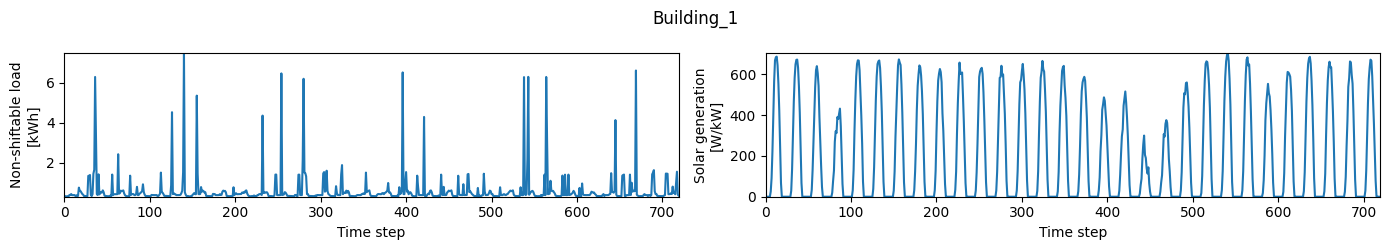

In [27]:
'''Plot non-shiftable load vs solar generation'''

fig, axs = plt.subplots(1, 2, figsize=(14, 2.5))
x = building_data.index
y1 = building_data['non_shiftable_load'] 
y2 = building_data['solar_generation']
axs[0].plot(x, y1)
axs[0].set_xlabel('Time step')
axs[0].set_ylabel('Non-shiftable load\n[kWh]')
axs[1].plot(x, y2)
axs[1].set_xlabel('Time step')
axs[1].set_ylabel('Solar generation\n[W/kW]')
fig.suptitle(selected_building)
plt.tight_layout()
plt.show()

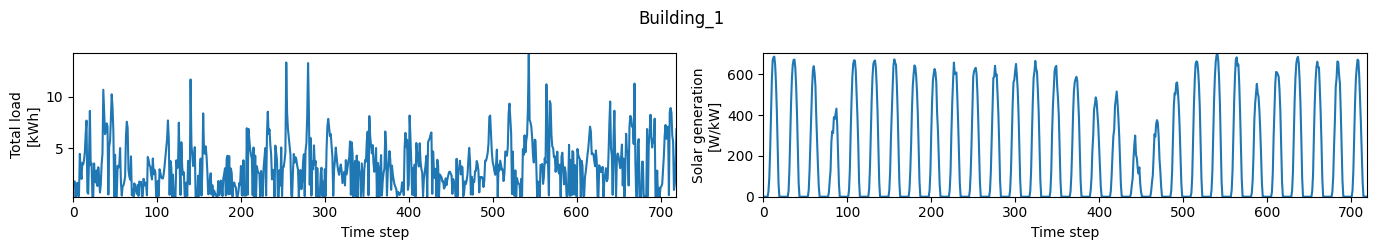

In [28]:
'''Plot total load vs solar generation'''

fig, axs = plt.subplots(1, 2, figsize=(14, 2.5))
x = building_data.index
y1 = building_data['non_shiftable_load'] + building_data["cooling_demand"]
y2 = building_data['solar_generation']
axs[0].plot(x, y1)
axs[0].set_xlabel('Time step')
axs[0].set_ylabel('Total load\n[kWh]')
axs[1].plot(x, y2)
axs[1].set_xlabel('Time step')
axs[1].set_ylabel('Solar generation\n[W/kW]')
fig.suptitle(selected_building)
plt.tight_layout()
plt.show()

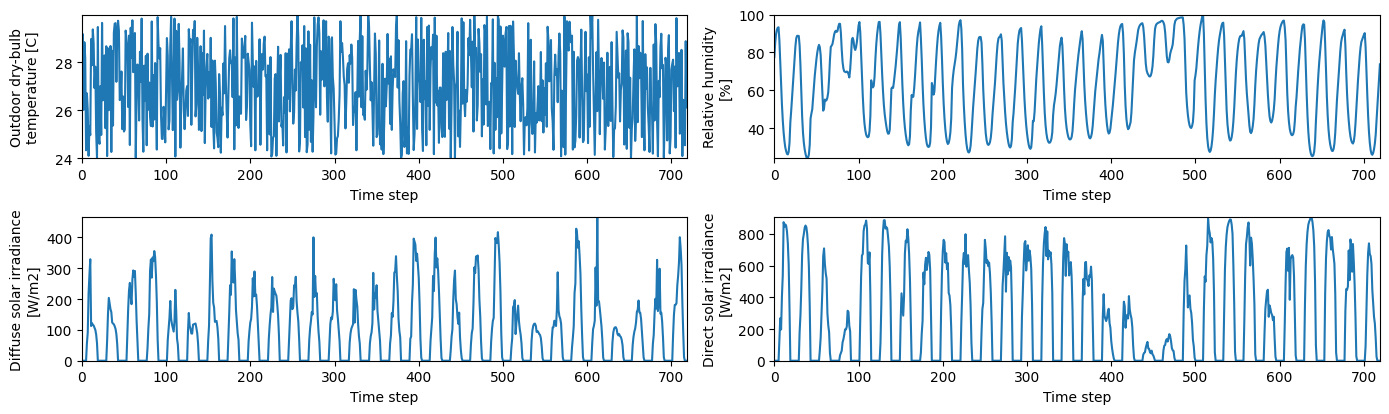

In [29]:
'''Plot weather data'''
columns = [
    'outdoor_dry_bulb_temperature', 'outdoor_relative_humidity',
    'diffuse_solar_irradiance', 'direct_solar_irradiance'
]
titles = [
    'Outdoor dry-bulb\ntemperature [C]', 'Relative humidity\n[%]',
    'Diffuse solar irradiance\n[W/m2]', 'Direct solar irradiance\n[W/m2]'
]
fig, axs = plt.subplots(2, 2, figsize=(14, 4.25))
x = weather_data.index

for ax, c, t in zip(fig.axes, columns, titles):
    y = weather_data[c]
    ax.plot(x, y)
    ax.set_xlabel('Time step')
    ax.set_ylabel(t)

fig.align_ylabels()
plt.tight_layout()
plt.show()

In [30]:
'''View carbon intensity data'''
filename = schema['buildings'][selected_building]['carbon_intensity']
filepath = os.path.join(root_directory, filename)
carbon_intensity_data = pd.read_csv(filepath)
display(carbon_intensity_data.head())
# carbon_intensity_data.info()

,carbon_intensity
0,0.402488
1,0.382625
2,0.369458
3,0.367017
4,0.374040


### Save changes to file


In [31]:
# filename = schema['buildings'][selected_building]['energy_simulation']
# filepath = os.path.join(root_directory, filename)
# building_data.to_csv(filepath, index=False)

In [32]:
filename = schema['buildings'][selected_building]['energy_simulation']
filepath = os.path.join(root_directory, filename)
building_data = pd.read_csv(filepath)
building_data.head(24)

,month,hour,day_type,daylight_savings_status,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,dhw_demand,cooling_demand,heating_demand,solar_generation,occupant_count,indoor_dry_bulb_temperature_set_point,hvac_mode
0,6,1,5,0,26.570960,0.0,61.086185,0.356839,0.055682,1.119216,0.0,0.000000,3.0,25.0,3
1,6,2,5,0,27.823807,0.0,64.361380,0.345078,0.159338,1.469638,0.0,0.000000,3.0,25.0,3
2,6,3,5,0,27.955587,0.0,64.493416,0.338769,0.057004,1.458372,0.0,0.000000,3.0,25.0,3
3,6,4,5,0,26.174590,0.0,64.769700,0.334856,0.000000,0.000000,0.0,0.000000,3.0,25.0,3
4,6,5,5,0,29.572357,0.0,65.152120,0.348607,0.000000,1.163453,0.0,0.000000,3.0,25.0,3
5,6,6,5,0,29.126673,0.0,65.871284,0.346894,0.334834,1.335715,0.0,0.000000,3.0,25.0,3
6,6,7,5,0,24.342377,0.0,66.065575,0.408589,0.905819,0.000000,0.0,25.331348,2.0,25.0,3
7,6,8,5,0,28.967399,0.0,65.945410,0.402513,0.000000,0.000000,0.0,91.302536,2.0,25.0,3
8,6,9,5,0,29.434836,0.0,64.098340,0.452810,3.315016,4.025016,0.0,221.975020,2.0,25.0,3
9,6,10,5,0,28.704231,0.0,62.219505,0.400676,0.215396,2.458844,0.0,401.644070,1.0,25.0,3


### Graph stuff

In [33]:
def get_kpis(env: CityLearnEnv) -> pd.DataFrame:
    """Returns evaluation KPIs.

    Electricity cost and carbon emissions KPIs are provided
    at the building-level and average district-level. Average daily peak,
    ramping and (1 - load factor) KPIs are provided at the district level.

    Parameters
    ----------
    env: CityLearnEnv
        CityLearn environment instance.

    Returns
    -------
    kpis: pd.DataFrame
        KPI table.
    """

    kpis = env.unwrapped.evaluate(comfort_band=1)

    # names of KPIs to retrieve from evaluate function
    kpi_names = {
        'cost_total': 'Cost',
        'carbon_emissions_total': 'Emissions',
        'discomfort_proportion': 'Discomfort total',
        'discomfort_cold_proportion': 'Cold discomfort proportion',
        'discomfort_hot_proportion': 'Hot discomfort proportion',
        'daily_peak_average': 'Avg. daily peak',
        'ramping_average': 'Ramping',
        'monthly_one_minus_load_factor_average': '1 - load factor',
        
    }


    kpis = kpis[
        (kpis['cost_function'].isin(kpi_names))
    ].dropna()
    kpis['cost_function'] = kpis['cost_function'].map(lambda x: kpi_names[x])

    # round up the values to 2 decimal places for readability
    kpis['value'] = kpis['value'].round(2)

    # rename the column that defines the KPIs
    kpis = kpis.rename(columns={'cost_function': 'kpi'})


    return kpis

In [34]:
def plot_building_kpis(envs) -> plt.Figure:
    """Plots electricity consumption, cost and carbon emissions
    at the building-level for different control agents in bar charts.

    Parameters
    ----------
    envs: dict[str, CityLearnEnv]
        Mapping of user-defined control agent names to environments
        the agents have been used to control.

    Returns
    -------
    fig: plt.Figure
        Figure containing plotted axes.
    """

    kpis_list = []

    for k, v in envs.items():
        kpis = get_kpis(v)
        kpis = kpis[kpis['level']=='building'].copy()
        kpis['building_id'] = kpis['name'].str.split('_', expand=True)[1]
        kpis['building_id'] = kpis['building_id'].astype(int).astype(str)
        kpis['env_id'] = k
        kpis_list.append(kpis)

    print(kpis_list)

    kpis = pd.concat(kpis_list, ignore_index=True, sort=False)
    kpi_names= kpis['kpi'].unique()
    column_count_limit = 2
    row_count = math.ceil(len(kpi_names)/column_count_limit)
    column_count = min(column_count_limit, len(kpi_names))
    building_count = len(kpis['name'].unique())
    env_count = len(envs)
    figsize = (3.5*column_count, 1*env_count*building_count*row_count)
    fig, _ = plt.subplots(
        row_count, column_count, figsize=figsize, sharey=True,
        gridspec_kw={'hspace': 3.5}


    )

    for i, (ax, (k, k_data)) in enumerate(zip(fig.axes, kpis.groupby('kpi'))):
        sns.barplot(x='value', y='name', data=k_data, hue='env_id', ax=ax)
        ax.set_xlabel(None)
        ax.set_ylabel(None)
        ax.set_title(k, verticalalignment =  'baseline')

        for j, _ in enumerate(envs):
            ax.bar_label(ax.containers[j], fmt='%.2f')

        if i == len(kpi_names) - 1:
           ax.legend(
            loc='upper left', bbox_to_anchor=(1.3, 1.0), framealpha=0.0
        )
        else:
            ax.legend().set_visible(False)

        for s in ['right','top']:
            ax.spines[s].set_visible(False)

    return fig

In [35]:
def plot_building_load_profiles(
    envs, daily_average: bool = None
) -> plt.Figure:
    """Plots building-level net electricty consumption profile
    for different control agents.

    Parameters
    ----------
    envs: dict[str, CityLearnEnv]
        Mapping of user-defined control agent names to environments
        the agents have been used to control.
    daily_average: bool, default: False
        Whether to plot the daily average load profile.

    Returns
    -------
    fig: plt.Figure
        Figure containing plotted axes.
    """

    daily_average = False if daily_average is None else daily_average
    building_count = len(list(envs.values())[0].buildings)
    column_count_limit = 4
    row_count = math.ceil(building_count/column_count_limit)
    column_count = min(column_count_limit, building_count)
    figsize = (8.0*column_count, 3*row_count)
    fig, _ = plt.subplots(row_count, column_count, figsize=figsize)

    for i, ax in enumerate(fig.axes):
        for k, v in envs.items():
            y = v.unwrapped.buildings[i].net_electricity_consumption
            y = np.reshape(y, (-1, 24)).mean(axis=0) if daily_average else y
            x = range(len(y))
            ax.plot(x, y, label=k)

        ax.set_title(v.unwrapped.buildings[i].name)
        ax.set_ylabel('kWh')

        if daily_average:
            ax.set_xlabel('Hour')
            ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

        else:
            ax.set_xlabel('Time step')
            ax.xaxis.set_major_locator(ticker.MultipleLocator(24))

        if i == building_count - 1:
            ax.legend(
                loc='upper left', bbox_to_anchor=(1.0, 1.0), framealpha=0.0
            )
        else:
            ax.legend().set_visible(False)


    plt.tight_layout()

    return fig


In [36]:
def plot_battery_soc_profiles(envs) -> plt.Figure:
    """Plots building-level battery SoC profiles fro different control agents.

    Parameters
    ----------
    envs: dict[str, CityLearnEnv]
        Mapping of user-defined control agent names to environments
        the agents have been used to control.

    Returns
    -------
    fig: plt.Figure
        Figure containing plotted axes.
    """

    building_count = len(list(envs.values())[0].buildings)
    column_count_limit = 4
    row_count = math.ceil(building_count/column_count_limit)
    column_count = min(column_count_limit, building_count)
    figsize = (8.0*column_count, 3*row_count)
    fig, _ = plt.subplots(row_count, column_count, figsize=figsize)

    for i, ax in enumerate(fig.axes):
        for k, v in envs.items():
            y = np.array(v.unwrapped.buildings[i].electrical_storage.soc)
            x = range(len(y))
            ax.plot(x, y, label=k)

        ax.set_title(v.unwrapped.buildings[i].name)
        ax.set_xlabel('Time step')
        ax.set_ylabel('SoC')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(24))
        ax.set_ylim(0.0, 1.0)

        if i == building_count - 1:
            ax.legend(
                loc='upper left', bbox_to_anchor=(1.0, 1.0), framealpha=0.0
            )
        else:
            ax.legend().set_visible(False)


    plt.tight_layout()

    return fig

In [37]:
def plot_simulation_summary(envs):
    """Plots KPIs, load and battery SoC profiles for different control agents.

    Parameters
    ----------
    envs: dict[str, CityLearnEnv]
        Mapping of user-defined control agent names to environments
        the agents have been used to control.
    """

    print('#'*8 + ' BUILDING-LEVEL ' + '#'*8)
    print('Building-level KPIs:')
    _ = plot_building_kpis(envs)
    plt.show()

    print('Building-level simulation period load profiles:')
    _ = plot_building_load_profiles(envs)
    plt.show()

    print('Building-level daily-average load profiles:')
    _ = plot_building_load_profiles(envs, daily_average=True)
    plt.show()

    print('Battery SoC profiles:')
    _ = plot_battery_soc_profiles(envs)
    plt.show()



### Pre-model setup steps

In [38]:
'''Randomly select period of simulation'''
def select_simulation_period(
    dataset_name: str, count: int, seed: int, simulation_periods_to_exclude: List[Tuple[int, int]] = None) -> Tuple[int, int]:
    """Randomly select environment simulation start and end time steps
    that cover a specified number of days.

    Parameters
    ----------
    dataset_name: str
        CityLearn dataset to query buildings from.
    count: int
        Number of simulation days.
    seed: int
        Seed for pseudo-random number generator.
    simulation_periods_to_exclude: list[tuple[int, int]]
        List of simulation periods to exclude from selection pool.

    Returns
    -------
    simulation_start_time_step: int
        The first time step in schema time series files to
        be read when constructing the environment.
    simulation_end_time_step: int
        The last time step in schema time series files to
        be read when constructing the environment.
    """

    assert 1 <= count <= 365, 'count must be between 1 and 365.'

    # set random seed
    np.random.seed(seed)

    # use any of the files to determine the total
    # number of available time steps
    schema = DataSet.get_schema(dataset_name)
    filename = schema['buildings'][selected_building]['carbon_intensity']
    filepath = os.path.join(root_directory, filename)
    time_steps = pd.read_csv(filepath).shape[0]

    # set candidate simulation start time steps
    # spaced by the number of specified days
    simulation_start_time_step_list = np.arange(0, time_steps, 24*count)

    # exclude period if needed
    if simulation_periods_to_exclude is not None:
        simulation_start_time_step_list_to_exclude = \
            [s for s, e in simulation_periods_to_exclude]
        simulation_start_time_step_list = np.setdiff1d(
            simulation_start_time_step_list,
            simulation_start_time_step_list_to_exclude
        )

    else:
        pass

    # randomly select a simulation start time step
    simulation_start_time_step = np.random.choice(
        simulation_start_time_step_list, size=1
    )[0]
    simulation_end_time_step = simulation_start_time_step + 24*count - 1

    return simulation_start_time_step, simulation_end_time_step

In [39]:
random_seed = 7


In [40]:
'''Pick simulation time steps'''
simulation_start, simulation_end = select_simulation_period(DATASET_NAME, 30, random_seed)
simulation_start

0

average_unmet_cooling_setpoint_difference - Difference between indoor_dry_bulb_temperature and cooling temperature 

In [41]:
'''Pick observations and agent'''
# active_observations = ["hour", "indoor_dry_bulb_temperature", "electricity_pricing", "indoor_dry_bulb_temperature_delta", "non_shiftable_load", "average_unmet_cooling_setpoint_difference",]
active_observations = ["hour", "indoor_dry_bulb_temperature", "electricity_pricing", "electricity_pricing_predicted_12h", 
                       "non_shiftable_load", "solar_generation", "indoor_dry_bulb_temperature_set_point", 
                        "outdoor_dry_bulb_temperature", "day_type" ]



CENTRAL_AGENT = True

### Observation variables

In [42]:
{
  "month": 6,
  "hour": 2,
  "day_type": 5,
  "indoor_dry_bulb_temperature": 27.823807,
  "non_shiftable_load": 0.34507817,
  "dhw_demand": 0.15933841,
  "cooling_demand": 1.4696382,
  "heating_demand": 0,
  "solar_generation": 0,
  "daylight_savings_status": 0,
  "average_unmet_cooling_setpoint_difference": 0,
  "indoor_relative_humidity": 64.36138,
  "occupant_count": 3,
  "indoor_dry_bulb_temperature_set_point": 25,
  "power_outage": 0,
  "comfort_band": 2,
  "indoor_dry_bulb_temperature_without_control": 27.823807,
  "cooling_demand_without_control": 1.4696382,
  "heating_demand_without_control": 0,
  "dhw_demand_without_control": 0.15933841,
  "non_shiftable_load_without_control": 0.34507817,
  "indoor_relative_humidity_without_control": 64.36138,
  "indoor_dry_bulb_temperature_set_point_without_control": 25,
  "hvac_mode": 3,
  "outdoor_dry_bulb_temperature": 29.26,
  "outdoor_relative_humidity": 85.12,
  "diffuse_solar_irradiance": 0,
  "direct_solar_irradiance": 0,
  "outdoor_dry_bulb_temperature_predicted_6h": 27.076563,
  "outdoor_dry_bulb_temperature_predicted_12h": 38.31935,
  "outdoor_dry_bulb_temperature_predicted_24h": 23.5155,
  "outdoor_relative_humidity_predicted_6h": 87.31766,
  "outdoor_relative_humidity_predicted_12h": 37.910023,
  "outdoor_relative_humidity_predicted_24h": 95.35395,
  "diffuse_solar_irradiance_predicted_6h": 78.37548,
  "diffuse_solar_irradiance_predicted_12h": 89.220505,
  "diffuse_solar_irradiance_predicted_24h": 0,
  "direct_solar_irradiance_predicted_6h": 300.36105,
  "direct_solar_irradiance_predicted_12h": 825.0973,
  "direct_solar_irradiance_predicted_24h": 0,
  "electricity_pricing": 0.02893,
  "electricity_pricing_predicted_6h": 0.02915,
  "electricity_pricing_predicted_12h": 0.02915,
  "electricity_pricing_predicted_24h": 0.02893,
  "carbon_intensity": 0.38262463,
  "cooling_storage_soc": 0,
  "heating_storage_soc": 0,
  "dhw_storage_soc": 0,
  "electrical_storage_soc": 0.19998,
  "net_electricity_consumption": 0.953301,
  "cooling_electricity_consumption": 0.43855977,
  "heating_electricity_consumption": 0,
  "dhw_electricity_consumption": 0.16966304,
  "cooling_storage_electricity_consumption": 0,
  "heating_storage_electricity_consumption": 0,
  "dhw_storage_electricity_consumption": 0,
  "electrical_storage_electricity_consumption": 0,
  "cooling_device_efficiency": 3.35105562,
  "heating_device_efficiency": 5.27710618,
  "dhw_device_efficiency": 0.939146312056097,
  "indoor_dry_bulb_temperature_delta": 2.8238068
}

{'month': 6,
 'hour': 2,
 'day_type': 5,
 'indoor_dry_bulb_temperature': 27.823807,
 'non_shiftable_load': 0.34507817,
 'dhw_demand': 0.15933841,
 'cooling_demand': 1.4696382,
 'heating_demand': 0,
 'solar_generation': 0,
 'daylight_savings_status': 0,
 'average_unmet_cooling_setpoint_difference': 0,
 'indoor_relative_humidity': 64.36138,
 'occupant_count': 3,
 'indoor_dry_bulb_temperature_set_point': 25,
 'power_outage': 0,
 'comfort_band': 2,
 'indoor_dry_bulb_temperature_without_control': 27.823807,
 'cooling_demand_without_control': 1.4696382,
 'heating_demand_without_control': 0,
 'dhw_demand_without_control': 0.15933841,
 'non_shiftable_load_without_control': 0.34507817,
 'indoor_relative_humidity_without_control': 64.36138,
 'indoor_dry_bulb_temperature_set_point_without_control': 25,
 'hvac_mode': 3,
 'outdoor_dry_bulb_temperature': 29.26,
 'outdoor_relative_humidity': 85.12,
 'diffuse_solar_irradiance': 0,
 'direct_solar_irradiance': 0,
 'outdoor_dry_bulb_temperature_predicted

## Initialize environments

### Baseline Agent

In [43]:

baseline_env = CityLearnEnv(
    DATASET_NAME,
    central_agent=CENTRAL_AGENT,
    buildings=selected_building,
    active_observations=active_observations,
    simulation_start_time_step=simulation_start,
    simulation_end_time_step=simulation_end,
)

baseline_model = BaselineAgent(baseline_env)

# always start by reseting the environment
observations, _ = baseline_env.reset()

# step through the environment until terminal
# state is reached i.e., the control episode ends
while not baseline_env.terminated:
    # select actions from the model
    actions = baseline_model.predict(observations)

    # apply selected actions to the environment
    observations, _, _, _, _ = baseline_env.step(actions)

NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL
NO COOL


######## BUILDING-LEVEL ########
Building-level KPIs:
DRY BULB TEMP setpoint -  0      25.0
1      25.0
2      25.0
3      25.0
4      25.0
       ... 
715    25.0
716    25.0
717    25.0
718    25.0
719    25.0
Name: dry_bulb_temperature_set_point, Length: 720, dtype: float32


DRY BULB TEMP setpoint -  0      25.0
1      25.0
2      25.0
3      25.0
4      25.0
       ... 
715    25.0
716    25.0
717    25.0
718    25.0
719    25.0
Name: dry_bulb_temperature_set_point, Length: 720, dtype: float32


[                           kpi  value        name     level building_id  \
23                   Emissions   1.00  Building_1  building           1   
24                        Cost   1.00  Building_1  building           1   
25            Discomfort total   0.84  Building_1  building           1   
26  Cold discomfort proportion   0.78  Building_1  building           1   
27   Hot discomfort proportion   0.06  Building_1  building           1   

      env_id  
23  Baseline  
24  Baseline  
25  Baseline  
26  Baseline  
27  Baseline  ]


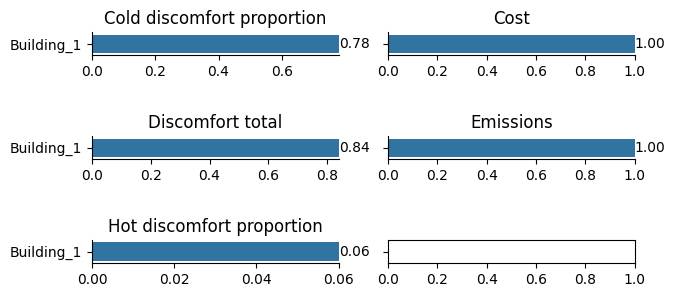

Building-level simulation period load profiles:


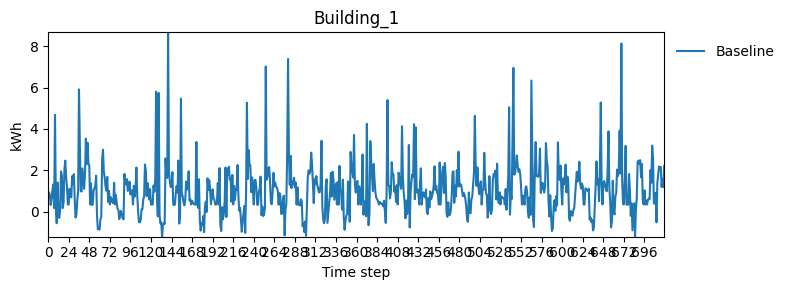

Building-level daily-average load profiles:


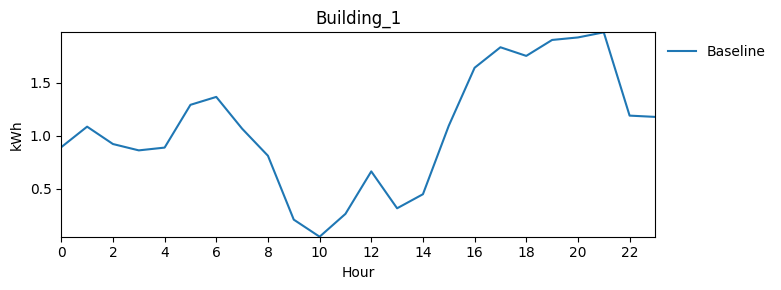

Battery SoC profiles:


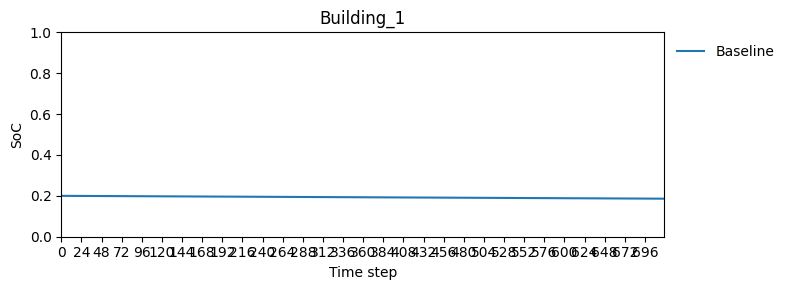

In [44]:
plot_simulation_summary({
    'Baseline': baseline_env,
})

### SAC controller 

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 1/250 [01:46<7:21:56, 106.49s/it]

  1%|          | 2/250 [04:01<8:30:07, 123.42s/it]

  1%|          | 3/250 [07:19<10:47:47, 157.36s/it]

  2%|▏         | 4/250 [10:10<11:06:55, 162.66s/it]

  2%|▏         | 5/250 [13:21<11:45:35, 172.80s/it]

  2%|▏         | 6/250 [15:41<10:57:59, 161.80s/it]

  3%|▎         | 7/250 [17:45<10:05:13, 149.44s/it]

  3%|▎         | 8/250 [19:43<9:22:27, 139.45s/it] 

  4%|▎         | 9/250 [21:06<8:09:31, 121.87s/it]

  4%|▍         | 10/250 [23:06<8:04:29, 121.12s/it]

  4%|▍         | 11/250 [25:06<8:00:51, 120.72s/it]

  5%|▍         | 12/250 [27:08<8:00:58, 121.26s/it]

  5%|▌         | 13/250 [29:18<8:09:47, 124.00s/it]

  6%|▌         | 14/250 [31:17<8:00:54, 122.27s/it]

  6%|▌         | 15/250 [34:01<8:48:39, 134.98s/it]

  6%|▋         | 16/250 [36:02<8:29:27, 130.63s/it]

  7%|▋         | 17/250 [38:03<8:16:52, 127.95s/it]

  7%|▋         | 18/250 [39:55<7:55:55, 123.08s/it]

  8%|▊         | 19/250 [42:06<8:02:28, 125.32s/it]

  8%|▊         | 20/250 [44:35<8:28:29, 132.65s/it]

  8%|▊         | 21/250 [46:33<8:08:40, 128.04s/it]

  9%|▉         | 22/250 [48:17<7:39:20, 120.88s/it]

  9%|▉         | 23/250 [50:15<7:34:40, 120.18s/it]

 10%|▉         | 24/250 [52:14<7:31:01, 119.74s/it]

 10%|█         | 25/250 [54:39<7:56:57, 127.19s/it]

 10%|█         | 26/250 [56:49<7:57:58, 128.03s/it]

 11%|█         | 27/250 [59:05<8:04:54, 130.47s/it]

 11%|█         | 28/250 [1:02:32<9:28:00, 153.52s/it]

 12%|█▏        | 29/250 [1:04:05<8:18:02, 135.22s/it]

 12%|█▏        | 30/250 [1:05:29<7:20:00, 120.00s/it]

 12%|█▏        | 31/250 [1:06:52<6:37:45, 108.97s/it]

 13%|█▎        | 32/250 [1:08:16<6:08:11, 101.34s/it]

 13%|█▎        | 33/250 [1:09:37<5:44:23, 95.22s/it] 

 14%|█▎        | 34/250 [1:10:59<5:28:34, 91.27s/it]

 14%|█▍        | 35/250 [1:12:44<5:42:21, 95.54s/it]

 14%|█▍        | 36/250 [1:14:18<5:38:16, 94.84s/it]

 15%|█▍        | 37/250 [1:15:47<5:31:14, 93.31s/it]

 15%|█▌        | 38/250 [1:17:33<5:42:41, 96.99s/it]

 16%|█▌        | 39/250 [1:19:40<6:12:24, 105.90s/it]

 16%|█▌        | 40/250 [1:21:42<6:27:33, 110.73s/it]

 16%|█▋        | 41/250 [1:23:54<6:48:30, 117.27s/it]

 17%|█▋        | 42/250 [1:25:45<6:40:14, 115.46s/it]

 17%|█▋        | 43/250 [1:27:53<6:51:14, 119.20s/it]

 18%|█▊        | 44/250 [1:29:53<6:49:20, 119.22s/it]

 18%|█▊        | 45/250 [1:31:53<6:48:57, 119.69s/it]

 18%|█▊        | 46/250 [1:34:14<7:08:26, 126.01s/it]

 19%|█▉        | 47/250 [1:36:10<6:55:42, 122.87s/it]

 19%|█▉        | 48/250 [1:38:09<6:49:44, 121.71s/it]

 20%|█▉        | 49/250 [1:40:03<6:39:56, 119.38s/it]

 20%|██        | 50/250 [1:41:58<6:33:32, 118.06s/it]

 20%|██        | 51/250 [1:44:23<6:58:26, 126.16s/it]

 21%|██        | 52/250 [1:46:12<6:39:19, 121.01s/it]

 21%|██        | 53/250 [1:48:05<6:29:37, 118.67s/it]

 22%|██▏       | 54/250 [1:50:05<6:29:24, 119.21s/it]

 22%|██▏       | 55/250 [1:51:56<6:19:00, 116.62s/it]

 22%|██▏       | 56/250 [1:54:06<6:29:44, 120.54s/it]

 23%|██▎       | 57/250 [1:56:07<6:28:55, 120.91s/it]

 23%|██▎       | 58/250 [1:58:05<6:23:40, 119.90s/it]

 24%|██▎       | 59/250 [2:00:04<6:20:46, 119.61s/it]

 24%|██▍       | 60/250 [2:02:03<6:18:10, 119.42s/it]

 24%|██▍       | 61/250 [2:04:10<6:23:11, 121.65s/it]

 25%|██▍       | 62/250 [2:06:05<6:15:31, 119.85s/it]

 25%|██▌       | 63/250 [2:07:57<6:06:12, 117.50s/it]

 26%|██▌       | 64/250 [2:09:56<6:05:37, 117.94s/it]

 26%|██▌       | 65/250 [2:11:53<6:02:20, 117.52s/it]

 26%|██▋       | 66/250 [2:14:03<6:12:17, 121.40s/it]

 27%|██▋       | 67/250 [2:16:02<6:07:53, 120.62s/it]

 27%|██▋       | 68/250 [2:17:56<6:00:03, 118.70s/it]

 28%|██▊       | 69/250 [2:19:56<5:59:02, 119.02s/it]

 28%|██▊       | 70/250 [2:21:49<5:52:03, 117.36s/it]

 28%|██▊       | 71/250 [2:24:06<6:07:20, 123.13s/it]

 29%|██▉       | 72/250 [2:26:03<5:59:30, 121.18s/it]

 29%|██▉       | 73/250 [2:27:57<5:51:24, 119.12s/it]

 30%|██▉       | 74/250 [2:29:52<5:45:59, 117.95s/it]

 30%|███       | 75/250 [2:31:56<5:48:52, 119.62s/it]

 30%|███       | 76/250 [2:34:09<5:58:48, 123.73s/it]

 31%|███       | 77/250 [2:36:07<5:51:56, 122.06s/it]

 31%|███       | 78/250 [2:38:02<5:44:02, 120.01s/it]

 32%|███▏      | 79/250 [2:39:51<5:32:00, 116.49s/it]

 32%|███▏      | 80/250 [2:41:44<5:27:17, 115.52s/it]

 32%|███▏      | 81/250 [2:44:04<5:45:53, 122.80s/it]

 33%|███▎      | 82/250 [2:46:02<5:40:02, 121.44s/it]

 33%|███▎      | 83/250 [2:47:59<5:34:31, 120.19s/it]

 34%|███▎      | 84/250 [2:50:04<5:36:25, 121.60s/it]

 34%|███▍      | 85/250 [2:52:26<5:50:38, 127.50s/it]

 34%|███▍      | 86/250 [2:54:43<5:56:16, 130.35s/it]

 35%|███▍      | 87/250 [2:56:56<5:56:32, 131.24s/it]

 35%|███▌      | 88/250 [3:00:15<6:49:22, 151.62s/it]

 36%|███▌      | 89/250 [3:02:43<6:43:44, 150.46s/it]

 36%|███▌      | 90/250 [3:04:07<5:48:20, 130.63s/it]

 36%|███▋      | 91/250 [3:05:29<5:07:25, 116.01s/it]

 37%|███▋      | 92/250 [3:06:54<4:41:12, 106.79s/it]

 37%|███▋      | 93/250 [3:08:16<4:19:33, 99.19s/it] 

 38%|███▊      | 94/250 [3:09:58<4:20:30, 100.20s/it]

 38%|███▊      | 95/250 [3:11:58<4:34:02, 106.08s/it]

 38%|███▊      | 96/250 [3:14:28<5:06:16, 119.33s/it]

 39%|███▉      | 97/250 [3:16:36<5:10:52, 121.91s/it]

 39%|███▉      | 98/250 [3:18:33<5:04:47, 120.31s/it]

 40%|███▉      | 99/250 [3:20:52<5:17:14, 126.06s/it]

 40%|████      | 100/250 [3:23:20<5:31:33, 132.62s/it]

 40%|████      | 101/250 [3:25:20<5:19:57, 128.84s/it]

 41%|████      | 102/250 [3:27:22<5:12:31, 126.70s/it]

 41%|████      | 103/250 [3:29:29<5:10:18, 126.66s/it]

 42%|████▏     | 104/250 [3:31:29<5:03:22, 124.67s/it]

 42%|████▏     | 105/250 [3:33:58<5:19:14, 132.10s/it]

 42%|████▏     | 106/250 [3:36:02<5:11:11, 129.66s/it]

 43%|████▎     | 107/250 [3:38:10<5:07:51, 129.17s/it]

 43%|████▎     | 108/250 [3:40:20<5:06:27, 129.49s/it]

 44%|████▎     | 109/250 [3:42:50<5:18:15, 135.43s/it]

 44%|████▍     | 110/250 [3:44:59<5:11:41, 133.58s/it]

 44%|████▍     | 111/250 [3:47:16<5:11:50, 134.61s/it]

 45%|████▍     | 112/250 [3:49:23<5:04:32, 132.41s/it]

 45%|████▌     | 113/250 [3:51:32<4:59:38, 131.23s/it]

 46%|████▌     | 114/250 [3:54:02<5:10:43, 137.09s/it]

 46%|████▌     | 115/250 [3:56:08<5:00:34, 133.59s/it]

 46%|████▋     | 116/250 [3:58:15<4:54:05, 131.69s/it]

 47%|████▋     | 117/250 [4:00:20<4:47:39, 129.77s/it]

 47%|████▋     | 118/250 [4:02:48<4:57:21, 135.16s/it]

 48%|████▊     | 119/250 [4:04:55<4:49:56, 132.80s/it]

 48%|████▊     | 120/250 [4:07:07<4:47:01, 132.47s/it]

 48%|████▊     | 121/250 [4:09:17<4:42:56, 131.60s/it]

 49%|████▉     | 122/250 [4:11:25<4:38:35, 130.59s/it]

 49%|████▉     | 123/250 [4:13:55<4:48:35, 136.34s/it]

 50%|████▉     | 124/250 [4:16:15<4:48:36, 137.43s/it]

 50%|█████     | 125/250 [4:27:52<10:36:20, 305.44s/it]

 50%|█████     | 126/250 [4:30:14<8:49:37, 256.27s/it] 

 51%|█████     | 127/250 [4:34:24<8:41:56, 254.60s/it]

 51%|█████     | 128/250 [4:37:15<7:46:34, 229.46s/it]

 52%|█████▏    | 129/250 [4:40:07<7:07:56, 212.20s/it]

 52%|█████▏    | 130/250 [4:43:27<6:56:48, 208.40s/it]

 52%|█████▏    | 131/250 [4:46:12<6:27:38, 195.45s/it]

 53%|█████▎    | 132/250 [4:48:48<6:01:26, 183.78s/it]

 53%|█████▎    | 133/250 [4:51:38<5:50:08, 179.56s/it]

 54%|█████▎    | 134/250 [4:54:48<5:53:05, 182.63s/it]

 54%|█████▍    | 135/250 [4:57:34<5:40:45, 177.78s/it]

 54%|█████▍    | 136/250 [5:00:26<5:34:21, 175.98s/it]

 55%|█████▍    | 137/250 [5:03:30<5:36:05, 178.45s/it]

 55%|█████▌    | 138/250 [5:05:42<5:06:41, 164.30s/it]

 56%|█████▌    | 139/250 [5:07:46<4:41:35, 152.21s/it]

 56%|█████▌    | 140/250 [5:09:44<4:20:28, 142.07s/it]

 56%|█████▋    | 141/250 [5:11:51<4:09:47, 137.50s/it]

 57%|█████▋    | 142/250 [5:14:14<4:10:42, 139.28s/it]

 57%|█████▋    | 143/250 [5:15:50<3:44:58, 126.15s/it]

 58%|█████▊    | 144/250 [5:17:12<3:19:35, 112.98s/it]

 58%|█████▊    | 145/250 [5:18:38<3:03:19, 104.75s/it]

 58%|█████▊    | 146/250 [5:20:01<2:50:21, 98.29s/it] 

 59%|█████▉    | 147/250 [5:21:24<2:41:08, 93.87s/it]

 59%|█████▉    | 148/250 [5:23:06<2:43:19, 96.08s/it]

 60%|█████▉    | 149/250 [5:24:30<2:35:53, 92.60s/it]

 60%|██████    | 150/250 [5:25:53<2:29:31, 89.72s/it]

 60%|██████    | 151/250 [5:27:16<2:24:41, 87.69s/it]

 61%|██████    | 152/250 [5:28:38<2:20:40, 86.12s/it]

 61%|██████    | 153/250 [5:30:01<2:17:30, 85.05s/it]

 62%|██████▏   | 154/250 [5:31:24<2:15:07, 84.46s/it]

 62%|██████▏   | 155/250 [5:33:05<2:21:39, 89.46s/it]

 62%|██████▏   | 156/250 [5:34:28<2:17:02, 87.47s/it]

 63%|██████▎   | 157/250 [5:35:51<2:13:41, 86.25s/it]

 63%|██████▎   | 158/250 [5:37:14<2:10:40, 85.23s/it]

 64%|██████▎   | 159/250 [5:38:49<2:13:41, 88.14s/it]

 64%|██████▍   | 160/250 [5:40:18<2:12:30, 88.34s/it]

 64%|██████▍   | 161/250 [5:41:41<2:08:46, 86.82s/it]

 65%|██████▍   | 162/250 [5:43:28<2:16:06, 92.80s/it]

 65%|██████▌   | 163/250 [5:44:51<2:10:27, 89.98s/it]

 66%|██████▌   | 164/250 [5:46:14<2:05:34, 87.61s/it]

 66%|██████▌   | 165/250 [5:47:37<2:02:08, 86.22s/it]

 66%|██████▋   | 166/250 [5:49:01<2:00:00, 85.72s/it]

 67%|██████▋   | 167/250 [5:50:25<1:57:57, 85.28s/it]

 67%|██████▋   | 168/250 [5:51:48<1:55:30, 84.52s/it]

 68%|██████▊   | 169/250 [5:53:26<1:59:31, 88.54s/it]

 68%|██████▊   | 170/250 [5:54:50<1:56:08, 87.10s/it]

 68%|██████▊   | 171/250 [5:56:15<1:53:53, 86.50s/it]

 69%|██████▉   | 172/250 [5:57:39<1:51:20, 85.65s/it]

 69%|██████▉   | 173/250 [5:59:03<1:49:34, 85.38s/it]

 70%|██████▉   | 174/250 [6:00:27<1:47:32, 84.90s/it]

 70%|███████   | 175/250 [6:01:50<1:45:31, 84.41s/it]

 70%|███████   | 176/250 [6:03:44<1:54:52, 93.15s/it]

 71%|███████   | 177/250 [6:05:10<1:50:41, 90.98s/it]

 71%|███████   | 178/250 [6:06:33<1:46:19, 88.61s/it]

 72%|███████▏  | 179/250 [6:07:56<1:42:51, 86.92s/it]

 72%|███████▏  | 180/250 [6:09:19<1:40:07, 85.82s/it]

 72%|███████▏  | 181/250 [6:10:43<1:37:57, 85.18s/it]

 73%|███████▎  | 182/250 [6:12:13<1:38:15, 86.70s/it]

 73%|███████▎  | 183/250 [6:14:50<2:00:18, 107.74s/it]

 74%|███████▎  | 184/250 [6:17:06<2:07:45, 116.14s/it]

 74%|███████▍  | 185/250 [6:19:07<2:07:27, 117.65s/it]

 74%|███████▍  | 186/250 [6:21:10<2:07:09, 119.21s/it]

 75%|███████▍  | 187/250 [6:23:35<2:13:16, 126.92s/it]

 75%|███████▌  | 188/250 [6:25:34<2:08:42, 124.55s/it]

 76%|███████▌  | 189/250 [6:27:37<2:06:24, 124.33s/it]

 76%|███████▌  | 190/250 [6:29:40<2:03:49, 123.82s/it]

 76%|███████▋  | 191/250 [6:31:45<2:02:07, 124.19s/it]

 77%|███████▋  | 192/250 [6:34:00<2:03:07, 127.37s/it]

 77%|███████▋  | 193/250 [6:36:07<2:01:00, 127.38s/it]

 78%|███████▊  | 194/250 [6:38:20<2:00:25, 129.02s/it]

 78%|███████▊  | 195/250 [6:40:25<1:57:09, 127.80s/it]

 78%|███████▊  | 196/250 [6:42:43<1:57:45, 130.85s/it]

 79%|███████▉  | 197/250 [6:44:46<1:53:22, 128.35s/it]

 79%|███████▉  | 198/250 [6:46:26<1:43:51, 119.85s/it]

 80%|███████▉  | 199/250 [6:47:50<1:32:44, 109.11s/it]

 80%|████████  | 200/250 [6:50:22<1:41:45, 122.12s/it]

 80%|████████  | 201/250 [6:52:47<1:45:23, 129.04s/it]

 81%|████████  | 202/250 [6:54:52<1:42:17, 127.86s/it]

 81%|████████  | 203/250 [6:57:03<1:40:45, 128.63s/it]

 82%|████████▏ | 204/250 [6:59:02<1:36:31, 125.90s/it]

 82%|████████▏ | 205/250 [7:01:10<1:34:49, 126.44s/it]

 82%|████████▏ | 206/250 [7:03:36<1:37:05, 132.39s/it]

 83%|████████▎ | 207/250 [7:05:41<1:33:07, 129.94s/it]

 83%|████████▎ | 208/250 [7:07:51<1:30:58, 129.96s/it]

 84%|████████▎ | 209/250 [7:09:59<1:28:36, 129.66s/it]

 84%|████████▍ | 210/250 [7:12:23<1:29:16, 133.90s/it]

 84%|████████▍ | 211/250 [7:14:37<1:26:55, 133.73s/it]

 85%|████████▍ | 212/250 [7:16:51<1:24:52, 134.01s/it]

 85%|████████▌ | 213/250 [7:19:03<1:22:13, 133.34s/it]

 86%|████████▌ | 214/250 [7:20:56<1:16:17, 127.15s/it]

 86%|████████▌ | 215/250 [7:22:37<1:09:41, 119.46s/it]

 86%|████████▋ | 216/250 [7:24:51<1:10:07, 123.75s/it]

 87%|████████▋ | 217/250 [7:26:55<1:08:08, 123.89s/it]

 87%|████████▋ | 218/250 [7:28:59<1:05:58, 123.72s/it]

 88%|████████▊ | 219/250 [7:31:26<1:07:35, 130.83s/it]

 88%|████████▊ | 220/250 [7:40:57<2:11:26, 262.90s/it]

 88%|████████▊ | 221/250 [7:44:15<1:57:41, 243.50s/it]

 89%|████████▉ | 222/250 [7:47:07<1:43:37, 222.05s/it]

 89%|████████▉ | 223/250 [7:49:56<1:32:39, 205.91s/it]

 90%|████████▉ | 224/250 [7:53:04<1:26:58, 200.70s/it]

 90%|█████████ | 225/250 [7:55:54<1:19:47, 191.50s/it]

 90%|█████████ | 226/250 [7:58:43<1:13:53, 184.72s/it]

 91%|█████████ | 227/250 [8:01:34<1:09:16, 180.70s/it]

 91%|█████████ | 228/250 [8:04:45<1:07:20, 183.64s/it]

 92%|█████████▏| 229/250 [8:07:31<1:02:28, 178.48s/it]

 92%|█████████▏| 230/250 [8:10:22<58:44, 176.25s/it]  

 92%|█████████▏| 231/250 [8:13:06<54:36, 172.43s/it]

 93%|█████████▎| 232/250 [8:16:31<54:42, 182.34s/it]

 93%|█████████▎| 233/250 [8:20:14<55:03, 194.34s/it]

 94%|█████████▎| 234/250 [8:23:07<50:09, 188.07s/it]

 94%|█████████▍| 235/250 [8:25:39<44:19, 177.32s/it]

 94%|█████████▍| 236/250 [8:29:15<44:02, 188.78s/it]

 95%|█████████▍| 237/250 [8:32:18<40:31, 187.06s/it]

 95%|█████████▌| 238/250 [8:35:25<37:23, 186.97s/it]

 96%|█████████▌| 239/250 [8:38:21<33:40, 183.66s/it]

 96%|█████████▌| 240/250 [8:41:10<29:54, 179.43s/it]

 96%|█████████▋| 241/250 [8:44:34<27:59, 186.62s/it]

 97%|█████████▋| 242/250 [8:47:29<24:26, 183.31s/it]

 97%|█████████▋| 243/250 [8:50:20<20:57, 179.61s/it]

 98%|█████████▊| 244/250 [8:53:28<18:11, 181.96s/it]

 98%|█████████▊| 245/250 [8:56:11<14:42, 176.51s/it]

 98%|█████████▊| 246/250 [8:59:01<11:38, 174.57s/it]

 99%|█████████▉| 247/250 [9:01:50<08:38, 172.67s/it]

 99%|█████████▉| 248/250 [9:04:23<05:33, 166.78s/it]

100%|█████████▉| 249/250 [9:06:27<02:33, 153.99s/it]

100%|██████████| 250/250 [9:08:33<00:00, 145.76s/it]

100%|██████████| 250/250 [9:08:33<00:00, 131.66s/it]

######## BUILDING-LEVEL ########
Building-level KPIs:
DRY BULB TEMP setpoint -  0      25.0
1      25.0
2      25.0
3      25.0
4      25.0
       ... 
715    25.0
716    25.0
717    25.0
718    25.0
719    25.0
Name: dry_bulb_temperature_set_point, Length: 720, dtype: float32


DRY BULB TEMP setpoint -  0      25.0
1      25.0
2      25.0
3      25.0
4      25.0
       ... 
715    25.0
716    25.0
717    25.0
718    25.0
719    25.0
Name: dry_bulb_temperature_set_point, Length: 720, dtype: float32


DRY BULB TEMP setpoint -  0      25.0
1      25.0
2      25.0
3      25.0
4      25.0
       ... 
715    25.0
716    25.0
717    25.0
718    25.0
719    25.0
Name: dry_bulb_temperature_set_point, Length: 720, dtype: float32
DRY BULB TEMP setpoint -  0      25.0
1      25.0
2      25.0
3      25.0
4      25.0
       ... 
715    25.0
716    25.0
717    25.0
718    25.0
719    25.0
Name: dry_bulb_temperature_set_point, Length: 720, dtype: float32


[                           kpi  value        name     level building_id  \
23                   Emissions   1.00  Building_1  building           1   
24                        Cost   1.00  Building_1  building           1   
25            Discomfort total   0.84  Building_1  building           1   
26  Cold discomfort proportion   0.78  Building_1  building           1   
27   Hot discomfort proportion   0.06  Building_1  building           1   

      env_id  
23  Baseline  
24  Baseline  
25  Baseline  
26  Baseline  
27  Baseline  ,                            kpi  value        name     level building_id env_id
23                   Emissions   0.84  Building_1  building           1  SAC-1
24                        Cost   0.82  Building_1  building           1  SAC-1
25            Discomfort total   0.30  Building_1  building           1  SAC-1
26  Cold discomfort proportion   0.21  Building_1  building           1  SAC-1
27   Hot discomfort proportion   0.08  Building_1  building   

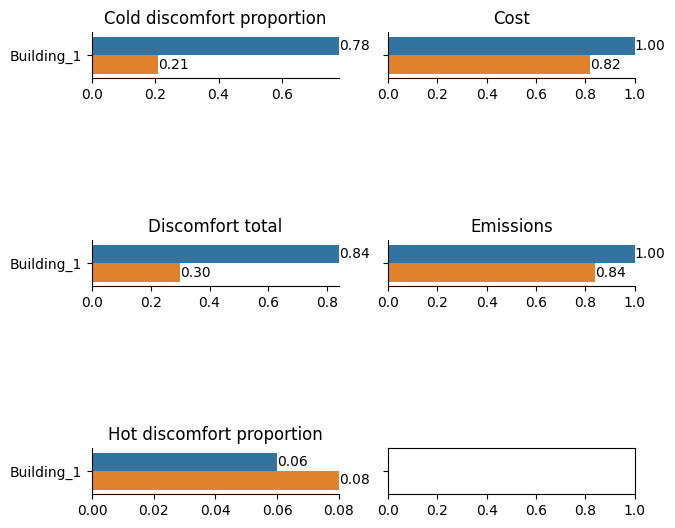

Building-level simulation period load profiles:


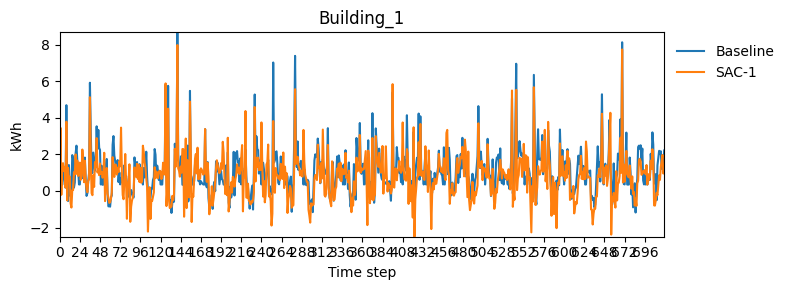

Building-level daily-average load profiles:


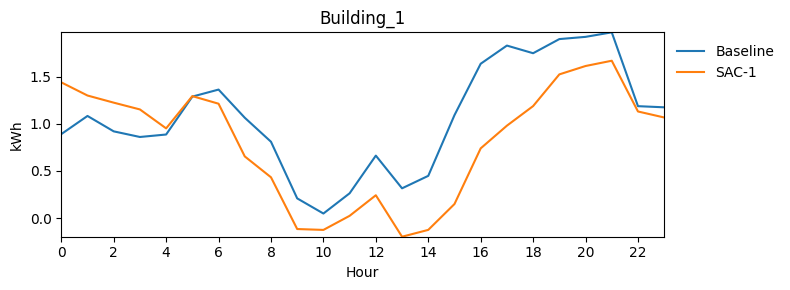

Battery SoC profiles:


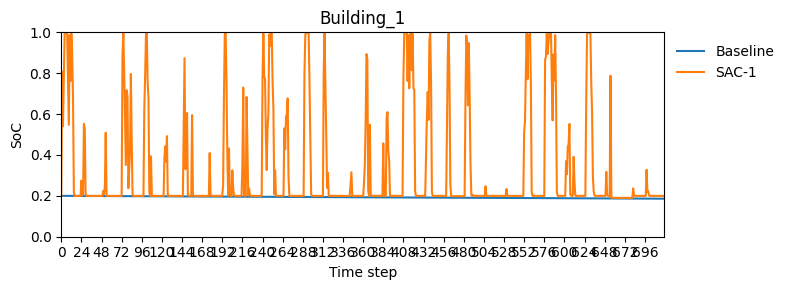

In [45]:
from citylearn.reward_function import SolarPenaltyAndComfortReward

sac_env = CityLearnEnv(
    DATASET_NAME,
    central_agent=CENTRAL_AGENT,
    buildings=selected_building,
    active_observations=active_observations,
    simulation_start_time_step=simulation_start,
    simulation_end_time_step=simulation_end,
)

sac_env = StableBaselines3Wrapper(sac_env)

sac_model = SAC(policy='MlpPolicy', env=sac_env, seed=random_seed)

sac_episodes = 250
sac_episode_timesteps = sac_env.unwrapped.time_steps - 1
sac_total_timesteps = sac_episodes*sac_episode_timesteps

# ------------------------------- TRAIN MODEL -----------------------------
for i in tqdm(range(sac_episodes)):
    sac_model = sac_model.learn(
        total_timesteps=sac_episode_timesteps,
        reset_num_timesteps=False,
    )

observations, _ = sac_env.reset()
sac_actions_list = []

while not sac_env.unwrapped.terminated:
    actions, _ = sac_model.predict(observations, deterministic=True)
    observations, _, _, _, _ = sac_env.step(actions)
    sac_actions_list.append(actions)

# plot summary and compare with other control results
plot_simulation_summary({
    'Baseline': baseline_env,
    'SAC-1': sac_env
})


### Save the model

In [46]:
# sac_model.save("Initial_model")


### Insights from the model


In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

def plot_actions(actions_list, building_names, title):
    """Plots action time series for different buildings

    Parameters
    ----------
    actions_list: list[list[float]]
        List of actions where each element with index, i,
        in list is a list of the actions for different buildings
        taken at time step i.
    building_names: list[str]:
        List of build names that map to the action lists.
    title: str
        Plot axes title

    Returns
    -------
    fig: plt.Figure
        Figure with plotted axes
    """

    fig, ax = plt.subplots(1, 1, figsize=(6, 1))
    plot_data = pd.DataFrame(actions_list, columns=building_names)
    x = list(range(plot_data.shape[0]))

    for c in plot_data.columns:
        y = plot_data[c].tolist()
        ax.plot(x, y, label=c)

    ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), framealpha=0.0)
    ax.set_xlabel('Time step')
    ax.set_ylabel(r'$\frac{kWh}{kWh_{capacity}}$')

    # Increase granularity of y-axis
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.2f}'.format(x)))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(0.2))

    ax.xaxis.set_major_locator(ticker.MultipleLocator(24))
    ax.set_title(title)

    return fig


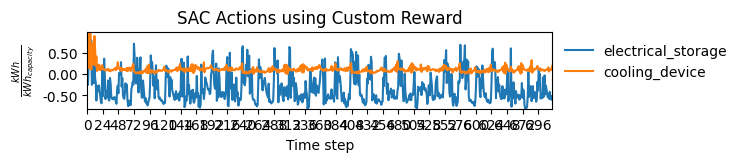

In [48]:
fig = plot_actions(sac_actions_list, [ "electrical_storage", "cooling_device"], 'SAC Actions using Custom Reward')
plt.show()

In [49]:
sac_actions_list
len(sac_actions_list)

719

In [50]:
def plot_rewards(ax, rewards, title: str) -> plt.Axes:
    """Plots rewards over training episodes.

    Parameters
    ----------
    rewards: list[float]
        List of reward sum per episode.
    title: str
        Plot axes title

    Returns
    -------
    ax: plt.Axes
        Plotted axes
    """

    ax.plot(rewards)
    ax.set_xlabel('Episode')
    ax.set_ylabel('Reward')
    ax.set_title(title)

    return ax

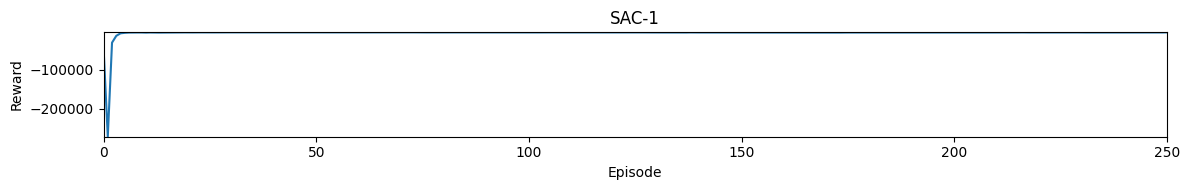

In [51]:
envs = {
    'SAC-1': pd.DataFrame(sac_env.unwrapped.episode_rewards)['sum'].tolist(),
}
fig, axs = plt.subplots(1, figsize=(12, 2))

for ax, (k, v) in zip(fig.axes, envs.items()):
    ax = plot_rewards(ax, v, k)

plt.tight_layout()
plt.show()

In [52]:
help(sac_env.unwrapped.reward_function)

Help on SolarPenaltyAndComfortReward in module citylearn.reward_function object:

class SolarPenaltyAndComfortReward(RewardFunction)
 |  SolarPenaltyAndComfortReward(env_metadata: Mapping[str, Any], band: float = None, lower_exponent: float = None, higher_exponent: float = None, coefficients: Tuple = None)
 |  
 |  Addition of :py:class:`citylearn.reward_function.SolarPenaltyReward` and :py:class:`citylearn.reward_function.ComfortReward`.
 |  
 |  Parameters
 |  ----------
 |  env_metadata: Mapping[str, Any]:
 |      General static information about the environment.
 |  band: float, default = 2.0
 |      Setpoint comfort band (+/-). If not provided, the comfort band time series defined in the
 |      building file, or the default time series value of 2.0 is used.
 |  lower_exponent: float, default = 2.0
 |      Penalty exponent for when in cooling mode but temperature is above setpoint upper
 |      boundary or heating mode but temperature is below setpoint lower boundary.
 |  higher_e

### Tuned SAC controller

In [53]:
# class CustomReward(RewardFunction):
#     def __init__(self, env_metadata):
#         r"""Initialize CustomReward.

#         Parameters
#         ----------
#         env_metadata: dict[str, Any]:
#             General static information about the environment.
#         """

#         super().__init__(env_metadata)

#     def calculate(
#         self, observations
#     ):
#         r"""Returns reward for most recent action.

#         The reward is designed to minimize electricity cost.
#         It is calculated for each building, i and summed to provide the agent
#         with a reward that is representative of all n buildings.
#         It encourages net-zero energy use by penalizing grid load satisfaction
#         when there is energy in the battery as well as penalizing
#         net export when the battery is not fully charged through the penalty
#         term. There is neither penalty nor reward when the battery
#         is fully charged during net export to the grid. Whereas, when the
#         battery is charged to capacity and there is net import from the
#         grid the penalty is maximized.

#         Parameters
#         ----------
#         observations: list[dict[str, int | float]]
#             List of all building observations at current
#             :py:attr:`citylearn.citylearn.CityLearnEnv.time_step`
#             that are got from calling
#             :py:meth:`citylearn.building.Building.observations`.

#         Returns
#         -------
#         reward: list[float]
#             Reward for transition to current timestep.
#         """

#         reward_list = []

#         for o, m in zip(observations, self.env_metadata['buildings']):
#             cost = o['net_electricity_consumption']*o['electricity_pricing']
#             battery_soc = o['electrical_storage_soc']
#             penalty = -(1.0 + np.sign(cost)*battery_soc)
#             reward = penalty*abs(cost)
#             reward_list.append(reward)

#         reward = [sum(reward_list)]

#         return reward

In [54]:
# sacr_env = CityLearnEnv(
#     DATASET_NAME,
#     central_agent=CENTRAL_AGENT,
#     buildings=selected_building,
#     active_observations=active_observations,
#     simulation_start_time_step=simulation_start,
#     simulation_end_time_step=simulation_end,
# )
# # sacr_env = NormalizedObservationWrapper(sacr_env)
# sacr_env = StableBaselines3Wrapper(sacr_env)
# sacr_model = SAC(policy='MlpPolicy', env=sacr_env, seed=random_seed)

# for i in tqdm(range(sac_episodes)):
#     sacr_model = sacr_model.learn(
#         total_timesteps=sac_episode_timesteps,
#         reset_num_timesteps=False,
#     )

In [55]:
# observations, _ = sacr_env.reset()
# sacr_actions_list = []

# while not sacr_env.unwrapped.terminated:
#     actions, _ = sacr_model.predict(observations, deterministic=True)
#     observations, _, _, _, _ = sacr_env.step(actions)
#     sacr_actions_list.append(actions)

# plot_simulation_summary({
#     'Baseline': baseline_env,
#     # Uncomment line below if you have completed Exercise 1
#     # 'Random': random_env,
#     'SAC-1': sac_env,
#     'SAC-2': sacr_env
# })

In [56]:
# envs = {
#     'SAC-1': pd.DataFrame(sac_env.unwrapped.episode_rewards)['sum'].tolist(),
#     'SAC-2': pd.DataFrame(sacr_env.unwrapped.episode_rewards)['sum'].tolist()
# }
# fig, axs = plt.subplots(1, 2, figsize=(12, 2))

# for ax, (k, v) in zip(fig.axes, envs.items()):
#     ax = plot_rewards(ax, v, k)

# plt.tight_layout()
# plt.show()

In [57]:
# fig = plot_actions(sacr_actions_list, ["electrical_storage", "cooling_device"], 'SAC Actions using Custom Reward')
# plt.show()

In [58]:
# help(sacr_env.unwrapped.reward_function)

### Rule-Based controller

In [59]:
# # define action map
# action_map = {
#     1: 0.0,
#     2: 0.0,
#     3: 0.0,
#     4: 0.0,
#     5: 0.0,
#     6: 0.0,
#     7: 0.0,
#     8: 0.10,
#     9: 0.10,
#     10: 0.10,
#     11: 0.10,
#     12: 0.10,
#     13: 0.15,
#     14: 0.15,
#     15: 0.15,
#     16: 0.05,
#     17: 0.0,
#     18: -0.10,
#     19: -0.20,
#     20: -0.20,
#     21: -0.10,
#     22: -0.10,
#     23: -0.10,
#     24: -0.10,
# }

# # run inference
# rbc_env = CityLearnEnv(
#     DATASET_NAME,
#     central_agent=CENTRAL_AGENT,
#     buildings=selected_building,
#     active_observations= active_observations,
#     simulation_start_time_step= simulation_start,
#     simulation_end_time_step= simulation_end,
# )
# rbc_model = HourRBC(rbc_env, action_map=action_map)
# observations, _ = rbc_env.reset()

# while not rbc_env.terminated:
#     actions = rbc_model.predict(observations)
#     observations, _, _, _, _ = rbc_env.step(actions)

# # display simulation summary
# plot_simulation_summary({
#     'Baseline': baseline_env,
#     # Uncomment line below if you have completed Exercise 1
#     # 'Random': random_env,
#     'RBC': rbc_env,
# })